## 따릉이 데이터를 활용한 데이터 분석

In [469]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- 각 날짜의 1시간 전의 기상상황을 가지고 1시간 후의 따릉이 대여수를 예측해보세요. 

## 1. 라이브러리 및 데이터
## Library & Data

In [470]:
import pandas as pd #판다스 패키지 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #랜덤 포레스트 불러오기

In [471]:
# 데이터 불러오기
# 모델 학습 파일
# 모델 시험지 파일
#답안지 파일 
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON/SEOUL_BICYCLE/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON/SEOUL_BICYCLE/data/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON/SEOUL_BICYCLE/data/submission.csv')

pd.set_option('display.max_rows', None) ## 모든 열을 출력한다.

## 2. 탐색적 자료분석
## Exploratory Data Analysis (EDA)


+ id : 날짜와 시간별 id
+ hour_bef_temperature : 1시간 전 기온
+ hour_bef_precipitation : 1시간 전 비 정보, 비가 오지 않았으면 0, 비가 오면 1
+ hour_bef_windspeed : 1시간 전 풍속(평균)
+ hour_bef_humidity : 1시간 전 습도
+ hour_bef_visibility : 1시간 전 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
+ hour_bef_ozone : 1시간 전 오존
+ hour_bef_pm10 : 1시간 전 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
+ hour_bef_pm2.5 : 1시간 전 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
+ count : 시간에 따른 따릉이 대여 수 

In [472]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [473]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [474]:
train[train['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
18,33,13,22.6,0.0,NaN,41.0,987.0,0.046,64.0,39.0,208.0
244,381,1,14.1,0.0,NaN,55.0,1992.0,NaN,NaN,NaN,38.0
260,404,3,14.0,0.0,NaN,50.0,2000.0,0.049,35.0,22.0,17.0
376,570,0,14.3,0.0,NaN,49.0,2000.0,0.044,37.0,20.0,58.0
780,1196,20,16.5,0.0,NaN,31.0,2000.0,0.058,39.0,18.0,181.0
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1138,1717,12,21.4,0.0,NaN,44.0,1375.0,0.044,61.0,37.0,116.0
1229,1855,2,14.0,0.0,NaN,52.0,2000.0,0.044,37.0,20.0,20.0


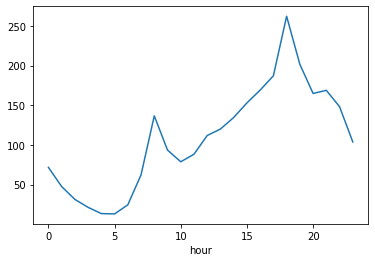

In [475]:
train.groupby('hour').mean()['count'].plot()

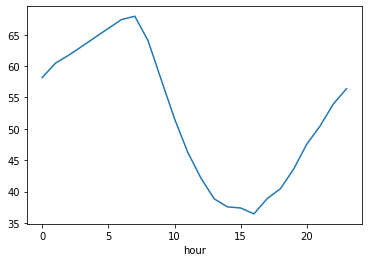

In [476]:
train.groupby('hour').mean()['hour_bef_humidity'].plot()

In [477]:
train.groupby('hour_bef_temperature').mean()['hour_bef_humidity']

hour_bef_temperature
3.1     83.000000
3.2     83.000000
3.3     83.000000
4.0     78.000000
4.2     77.000000
4.4     71.000000
4.5     73.000000
4.6     76.000000
4.9     75.000000
5.0     59.000000
5.1     77.000000
5.3     76.000000
5.4     78.000000
5.5     67.000000
5.6     79.500000
5.7     75.500000
5.9     74.000000
6.0     57.000000
6.3     76.000000
6.4     67.666667
6.6     77.000000
6.7     58.000000
6.8     81.000000
7.0     66.000000
7.1     62.000000
7.2     55.000000
7.3     66.000000
7.4     57.000000
7.5     67.666667
7.6     76.000000
7.7     65.500000
7.9     67.666667
8.0     59.500000
8.1     62.000000
8.2     71.000000
8.3     55.000000
8.4     64.000000
8.5     54.500000
8.6     73.500000
8.7     65.000000
8.8     58.000000
8.9     63.800000
9.0     69.666667
9.1     77.750000
9.2     67.571429
9.3     47.000000
9.4     79.750000
9.5     63.555556
9.6     79.333333
9.7     87.000000
9.8     60.500000
9.9     72.000000
10.0    71.500000
10.1    56.454545
10.2   

In [478]:
train.groupby('hour_bef_temperature').mean()['hour_bef_humidity'].interpolate()

hour_bef_temperature
3.1     83.000000
3.2     83.000000
3.3     83.000000
4.0     78.000000
4.2     77.000000
4.4     71.000000
4.5     73.000000
4.6     76.000000
4.9     75.000000
5.0     59.000000
5.1     77.000000
5.3     76.000000
5.4     78.000000
5.5     67.000000
5.6     79.500000
5.7     75.500000
5.9     74.000000
6.0     57.000000
6.3     76.000000
6.4     67.666667
6.6     77.000000
6.7     58.000000
6.8     81.000000
7.0     66.000000
7.1     62.000000
7.2     55.000000
7.3     66.000000
7.4     57.000000
7.5     67.666667
7.6     76.000000
7.7     65.500000
7.9     67.666667
8.0     59.500000
8.1     62.000000
8.2     71.000000
8.3     55.000000
8.4     64.000000
8.5     54.500000
8.6     73.500000
8.7     65.000000
8.8     58.000000
8.9     63.800000
9.0     69.666667
9.1     77.750000
9.2     67.571429
9.3     47.000000
9.4     79.750000
9.5     63.555556
9.6     79.333333
9.7     87.000000
9.8     60.500000
9.9     72.000000
10.0    71.500000
10.1    56.454545
10.2   

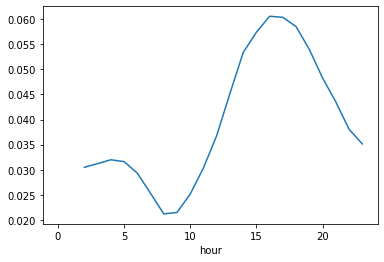

In [479]:
train.groupby('hour').mean()['hour_bef_ozone'].plot()

In [480]:
import matplotlib.pyplot as plt

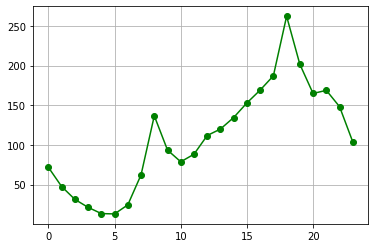

In [481]:
plt.plot(train.groupby('hour').mean()['count'],'go-')
plt.grid()

### pd.DataFrame.corr()

- correlation coefficient 의 줄임말 입니다 

In [482]:
import seaborn as sns

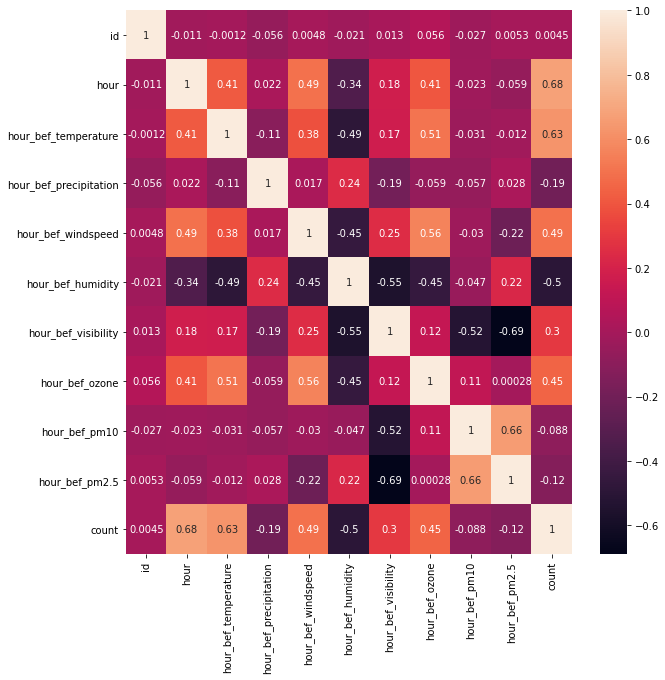

In [483]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(method='spearman'),annot=True)

## 3. 데이터 전처리
## Data Cleansing & Pre-Processing  

### pd.Series.isna()
- 결측치 여부를 확인해줍니다.
- 결측치면 True, 아니면 False

In [484]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [485]:
for i in train[train['hour_bef_temperature'].isna()].index :
  train.loc[[i],['hour_bef_temperature']]=train.groupby('hour').mean()['hour_bef_temperature'][train['hour'][i]]

In [486]:
for i in train[train['hour_bef_windspeed'].isna()].index :
  train.loc[[i],['hour_bef_windspeed']]=train.groupby('hour').mean()['hour_bef_windspeed'][train['hour'][i]]

In [487]:
train.groupby('hour_bef_temperature').mean()['hour_bef_humidity'].interpolate()
#14.788136    58.119048 
#20.926667    49.966667

hour_bef_temperature
3.100000     83.000000
3.200000     83.000000
3.300000     83.000000
4.000000     78.000000
4.200000     77.000000
4.400000     71.000000
4.500000     73.000000
4.600000     76.000000
4.900000     75.000000
5.000000     59.000000
5.100000     77.000000
5.300000     76.000000
5.400000     78.000000
5.500000     67.000000
5.600000     79.500000
5.700000     75.500000
5.900000     74.000000
6.000000     57.000000
6.300000     76.000000
6.400000     67.666667
6.600000     77.000000
6.700000     58.000000
6.800000     81.000000
7.000000     66.000000
7.100000     62.000000
7.200000     55.000000
7.300000     66.000000
7.400000     57.000000
7.500000     67.666667
7.600000     76.000000
7.700000     65.500000
7.900000     67.666667
8.000000     59.500000
8.100000     62.000000
8.200000     71.000000
8.300000     55.000000
8.400000     64.000000
8.500000     54.500000
8.600000     73.500000
8.700000     65.000000
8.800000     58.000000
8.900000     63.800000
9.000000     

In [488]:
train['hour_bef_humidity'].fillna({934:58.119048,1035:49.966667},inplace=True)

In [489]:
train[train['hour_bef_humidity'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count


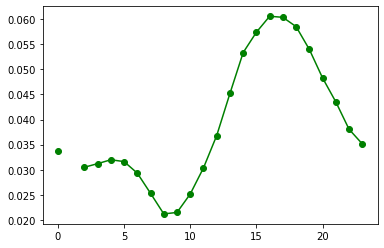

In [490]:
plt.plot(train.groupby('hour').mean()['hour_bef_ozone'],'go-')

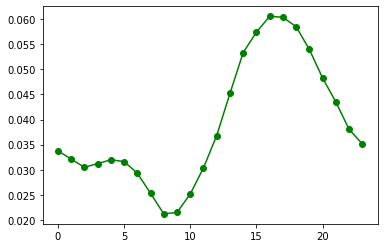

In [491]:
plt.plot(train.groupby('hour').mean()['hour_bef_ozone'].interpolate(),'go-')

In [492]:
train.groupby('hour').mean()['hour_bef_ozone'].interpolate()

hour
0     0.033763
1     0.032127
2     0.030492
3     0.031213
4     0.031984
5     0.031623
6     0.029317
7     0.025300
8     0.021197
9     0.021492
10    0.025167
11    0.030367
12    0.036817
13    0.045203
14    0.053344
15    0.057400
16    0.060579
17    0.060362
18    0.058508
19    0.053967
20    0.048279
21    0.043517
22    0.038066
23    0.035148
Name: hour_bef_ozone, dtype: float64

In [493]:
  train.at[i,'hour_bef_ozone']=0.032127

In [494]:
for i in train[train['hour_bef_ozone'].isna()].index:
  train.at[i,'hour_bef_ozone']=0.032127

In [495]:
train[train['hour_bef_ozone'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count


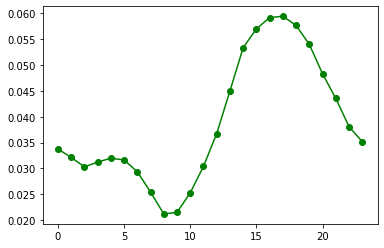

In [496]:
plt.plot(train.groupby('hour').mean()['hour_bef_ozone'],'go-')

In [497]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      2
hour_bef_windspeed          0
hour_bef_humidity           0
hour_bef_visibility         2
hour_bef_ozone              0
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [498]:
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [499]:
test[test['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [500]:
train.groupby('hour').mean()['hour_bef_temperature']

hour
0     14.788136
1     14.155738
2     13.747541
3     13.357377
4     13.001639
5     12.673770
6     12.377049
7     12.191803
8     12.600000
9     14.318033
10    16.242623
11    18.019672
12    19.457377
13    20.648333
14    21.234426
15    21.744262
16    22.015000
17    21.603333
18    20.926667
19    19.704918
20    18.191803
21    16.978333
22    16.063934
23    15.418033
Name: hour_bef_temperature, dtype: float64

In [501]:
test['hour_bef_temperature'].fillna(19.704918,inplace=True)


In [502]:
test['hour_bef_temperature'][653]

19.704918

In [503]:
test[test['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,19.704918,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [504]:
train.groupby('hour').mean()['hour_bef_windspeed']

hour
0     1.965517
1     1.836667
2     1.633333
3     1.620000
4     1.409836
5     1.296721
6     1.331148
7     1.262295
8     1.632787
9     1.829508
10    2.122951
11    2.485246
12    2.766667
13    3.281356
14    3.522951
15    3.768852
16    3.820000
17    3.801667
18    3.838333
19    3.595082
20    3.278333
21    2.755000
22    2.498361
23    2.195082
Name: hour_bef_windspeed, dtype: float64

In [505]:
test['hour_bef_windspeed'].fillna(3.595082,inplace=True)


In [506]:
test[test['hour_bef_humidity'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,19.704918,NaN,3.595082,NaN,NaN,NaN,NaN,NaN


In [ ]:
test.groupby('hour_bef_temperature').mean()['hour_bef_humidity'].interpolate()
#19.704918    59.458333

In [508]:
test['hour_bef_humidity'].fillna(59.458333,inplace=True)

In [ ]:
plt.plot(test.groupby('hour').mean()['hour_bef_ozone'],'go-')

In [510]:
test.groupby('hour').mean()['hour_bef_ozone'].interpolate()

hour
0     0.029933
1     0.029667
2     0.029400
3     0.031267
4     0.032833
5     0.032690
6     0.031633
7     0.028100
8     0.025800
9     0.026900
10    0.029367
11    0.034067
12    0.040000
13    0.049276
14    0.058893
15    0.065138
16    0.067759
17    0.066759
18    0.061655
19    0.054207
20    0.048133
21    0.041000
22    0.034767
23    0.032733
Name: hour_bef_ozone, dtype: float64

In [ ]:
test[test['hour_bef_ozone'].isna()]

In [513]:
for i in test[test['hour_bef_ozone'].isna()].index:
  test.at[i,'hour_bef_ozone'] = test.groupby('hour').mean()['hour_bef_ozone'].interpolate()[test.hour[i]]

In [515]:
test[test['hour_bef_ozone'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5


In [516]:
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       0
hour_bef_precipitation     1
hour_bef_windspeed         0
hour_bef_humidity          0
hour_bef_visibility        1
hour_bef_ozone             0
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

## 4. 변수 선택 및 모델 구축
## Feature Engineering & Initial Modeling  

### sklearn.ensemble.RandomForestRegressor()
- 랜덤 포레스트 모형

In [517]:
features = ['hour' , 'hour_bef_temperature' , 'hour_bef_windspeed','hour_bef_humidity','hour_bef_ozone']

X_train = train[features]
y_train = train['count']
X_test = test[features]

In [520]:
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10,shuffle=True, random_state=111)

In [521]:
from sklearn.model_selection import GridSearchCV

In [522]:
model = RandomForestRegressor( random_state=111)

params = { 
    'n_estimators' : [100,500,1000,2000],
    'max_depth' :[10,20,30] ,
    }
# 대회에서는 RMSE 가 평가지표이므로 scoring 을 neg_mean_squared_error 로 설정
gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  scoring = 'neg_mean_squared_error',
                  cv=k_fold) # 일반적으로 kfold를 사용하고 cv=5 해도 동일

In [523]:
gs.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=111, shuffle=True),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=111,
                                             verb

In [524]:
gs.best_params_

{'max_depth': 20, 'n_estimators': 2000}

In [531]:
model=RandomForestRegressor( n_estimators = 2000 , max_depth =20 , random_state=111)
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=2000, n_jobs=None, oob_score=False,
                      random_state=111, verbose=0, warm_start=False)

In [532]:
gsRFR = submission.copy()
gsRFR['count']=model.predict(X_test)
gsRFR.to_csv('bicycle_2000_20_v1.csv',index=False)

# **RandomForestRegressor()**

def __init__(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

n_estimators : 질문을 하고자 하는 나무들의 개수
n_jobs : 사용하고자 하는 CPU 개수
max_depth : 모델 깊이

# **DecisionTreeRegressor()**

def __init__(criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort='deprecated', ccp_alpha=0.0)